Here is the rubric I will be using to grade Lab 3.  You must have these exact sections in your project, if you want me to grade it!  Lab 3 is due Sunday, 11/28/2021 by 11:59PM.

Category |Available |Requirements
-----|-----|----- 
Total Points | 100 | 
Business Understanding 1 |10|Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?
Data Understanding 1 | 10 |Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
Data Understanding 2|10|Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
Modeling and Evaluation 1|10|Train and adjust parameters
Modeling and Evaluation 2|10|Evaluate and Compare
Modeling and Evaluation 3|10|Visualize Results
Modeling and Evaluation 4|20|Summarize the Ramifications
Deployment|10|Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
Exceptional Work|10|You have free reign to provide additional analyses or combine analyses.

- Data Source: https://www.kaggle.com/jessemostipak/hotel-booking-demand
- Data Description Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

# Business Understanding 1

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

##### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). 

The reason why we choose this data set is that it can be helpful in making insights in the nature of hotel bookings, and realize what  other factors that can influence whether rooms are booked, canceled or left empty. This data set comes from an article “Hotel booking demand datasets” Nuno Antonio, Anade Almeida and Luis Nunes that has been cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday. Models that are created can assist consumers to know what factor to look for when booking a hotel. Other models that are created can be also be used by employers and employees that work in the hospitality business. 

#####  How will you measure the effectiveness of a good algorithm?

Using different combinations of clustering with a logistic regression of the dataset we will create models. We will measure the effectiveness of a good algorithm by seeing whether there if the accuracy of the prediction goes up. We will also look at the standard deviations to see if the model is consistent on its level of accuracy. 

#####  Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?

Using  accuracy makes sense for this specific data  set because it can show how good the model will be at predicting if the hotel booking will be cancelled. The  main stake holders, which are the hotel corporations, will be better able to predict if any rooms will be available for a weekend. Once knowing this the hotel corporations,  be able to overbook or adjust room rates accordingly in order to have minimize loss to revenue. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding 1

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [2]:
hotel = pd.read_csv("data/hotel_bookings.csv",low_memory=False)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.**

### Data Description
- Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

Variable |Type |Description | Further Description
-----|-----|-----|----|
ADR | Numeric | Average Daily Rate |  
Adults | Integer | Number of adults
Agent | Categorical | ID of the travel agency that made the booking
ArrivalDateDayOfMonth | Categorical | Day of the month of the arrival date
ArrivalDateMonth | Numeric | Month of arrival date with 12 categories: “January” to “December”
ArrivalDateWeekNumber | Numeric | Week number of the arrival date
ArrivalDateYear | Numeric | Year of arrival date
AssignedRoomType | Numeric | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
Babies | Integer | Number of babies
BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
Children | Integer | Number of children
Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. 
Country | Categorical | Country of origin.
CustomerType | Categorical | Type of booking. | Assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is asso- ciated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer
DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. | This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
DistributionChannel | Integer | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0)
IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0)
LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
MarketSegment | Categorical | Market segment designation. | In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
Meal | Categorical | Type of meal booked. Categories are presented in standard hospitality meal packages: | Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
PreviousBookingsNotCanceled | Integer | Number of previous bookings that were NOT cancelled by the customer prior to the current booking
PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking
RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer
ReservationStatus | Categorical | Reservation last status | assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
ReservationStatusDate | Date | Date at which the last status was set |
ReservedRoomType | Categorical | Code of room type reserved. |
StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor)|





In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Verify data quality: 
**Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?**

In [4]:
missing_vals = hotel.isna().sum().reset_index()
missing_vals.columns = ["Variable Name","Number of Missing Values"]
missing_vals.sort_values(by="Number of Missing Values", ascending=False)

,Variable Name,Number of Missing Values
24,company,112593
23,agent,16340
13,country,488
10,children,4
19,reserved_room_type,0
20,assigned_room_type,0
21,booking_changes,0
22,deposit_type,0
0,hotel,0
17,previous_cancellations,0


- Looking at the missing values, we can see that the categorical variable `company` has 112,593 missing values of the 119,390 instances. So we decided to remove it entirely. 

Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

- It is important to note that from the data source the NA values are consider as "Not Applicable". For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent. 

- The categorical variable `agent` has over 16340 missing values and `country` has 488 missing values. We removed the `country` variable entirely, because we don't think that it will be a useful predictor in our model. So we decided to drop the subset of NA values for `agent` and `children`. We still wanted to remove the subset of these columns before we do not know where how the customer booked the hotel nor where their country of origin is.

In [5]:
#dropping `company` and `country columns
hotel = hotel.drop(columns = ["company","country"])

In [6]:
hotel=hotel.dropna(subset=['agent',"children"])

In [7]:
no_missing_vals = hotel.isna().sum().reset_index()
no_missing_vals.columns = ["Variable Name","Number of Missing Values"]
no_missing_vals

,Variable Name,Number of Missing Values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


Looking at the duplicates, we are not worried about duplicates because of the nature of the dataset. Each instance shows us when a booking resulted in a cancellation or not. The data source did not mention anything about duplicate in the dataset. 

### Looking at outliers:

In [8]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000,103048.000000
mean,0.390032,111.674336,2016.156510,27.339327,15.784198,0.977874,2.589337,1.899464,0.111142,0.007686,0.014023,0.077216,0.024862,0.201702,86.694841,2.615665,104.619980,0.053218,0.605368
std,0.487759,107.671506,0.706216,13.285300,8.794013,1.003935,1.905763,0.491057,0.411817,0.097017,0.117584,0.757689,0.436639,0.624797,110.775127,18.783661,50.034041,0.225719,0.799222
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.800000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,169.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [9]:
hotel = hotel[hotel.adr != 5400]
hotel = hotel[hotel.adr != -6.38]
hotel = hotel[hotel.previous_bookings_not_canceled != 50]
hotel = hotel[hotel.days_in_waiting_list != 391]
hotel = hotel[hotel.previous_cancellations != 26]
hotel = hotel[hotel.adults != 26]
hotel = hotel[hotel.children != 10]
hotel = hotel[hotel.babies != 10]

<AxesSubplot:>

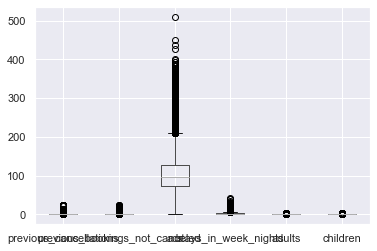

In [10]:
df = pd.DataFrame(data = hotel, columns = ['previous_cancellations', 'previous_bookings_not_canceled', 'adr','stays_in_week_nights', 'adults', 'children'])
df.boxplot()

In [11]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000,102967.000000
mean,0.389581,111.473997,2016.156934,27.329018,15.786271,0.977944,2.590014,1.898230,0.111133,0.007595,0.014014,0.070663,0.024377,0.201744,86.702099,2.446842,104.606121,0.053260,0.605825
std,0.487658,107.429228,0.706187,13.284131,8.792920,1.003862,1.905747,0.461633,0.410813,0.091924,0.117550,0.636065,0.408056,0.624900,110.785023,16.945466,47.232655,0.225803,0.799359
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,26.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.990000,0.000000,0.000000
50%,0.000000,79.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000
75%,1.000000,168.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,9.000000,1.000000,25.000000,25.000000,18.000000,535.000000,379.000000,510.000000,3.000000,5.000000


# Incomplete:
There are certainly some outliers such as... number of adults etc.

In [12]:
hotel["is_canceled"].value_counts().reset_index().sort_values(by="is_canceled",ascending=False)

,index,is_canceled
0,0,62853
1,1,40114


# Data Understanding 2

Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.

## What type of hotel has more bookings?

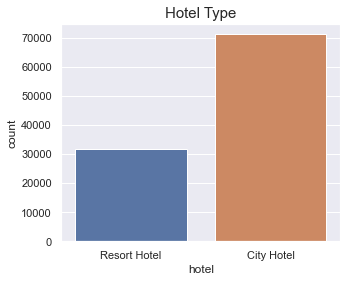

In [13]:
# Count for both hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=hotel, x = 'hotel')
plt.show()

From the graph above, majority of the bookings were made in city hotels. This could be because city hotels tend to be cheaper, everything is more accessible for individuals or small groups of visitors. Resort prices could reduce the price to increase bookings.

## Which are the most busy months?

Text(0, 0.5, 'Count')

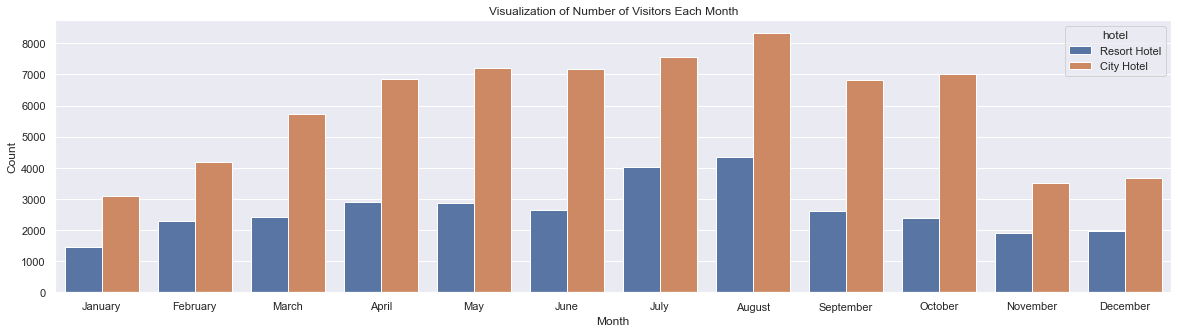

In [14]:
#Which are the most busy months?
plt.figure(figsize=(20,5))

# data we will use in a list
l2 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel[l2],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Visualization of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Count')

From the graph above, we can see that August is the busiest month for both City hotels and Resort hotels whereas bookings are lowest during January for both types of hotels. This could be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring or Summer and not during Winter.

## Cancellation rates in the two types of hotels

C:\Users\drsco\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Bookings Cancelled')

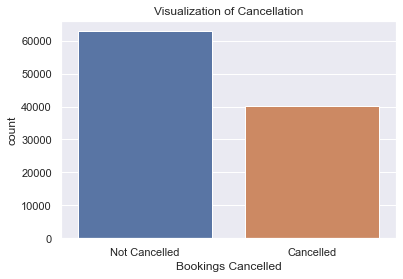

In [15]:
#Replace the 1s and 0s in the is_cancelled column to cancelled and not cancelled
hotel['is_canceled'] = hotel.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = hotel['is_canceled']

# Plotting
sns.countplot(cancelled_data).set_title("Visualization of Cancellation")
plt.xlabel("Bookings Cancelled")

From the graph above, We can see that more than 60% of the bookings were not cancelled.

Text(0.5, 1.0, 'Cancellation rates in city and resort hotel')

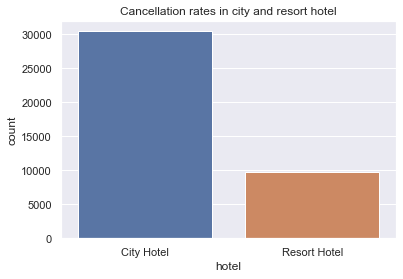

In [16]:
# Let's look into how much of bookings were cancelled in each type of hotel
lst2 = ['is_canceled', 'hotel']
type_of_hotel_canceled = hotel[lst2]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'Cancelled'].groupby(['hotel']).size().reset_index(name = 'count')
canceled_hotel
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Cancellation rates in city and resort hotel')

From the cancellation graph showing the hotel types, we can see that city hotels have three times more cancellations than resort hotels and that is because city hotels have more bookings as we have seen earlier.

## Who travels and in which group?

[Text(0.5, 1.0, 'Number of children'),
 Text(551.7838235294118, 0.5, 'Total number'),
 Text(0.5, 21.5, 'Group size')]

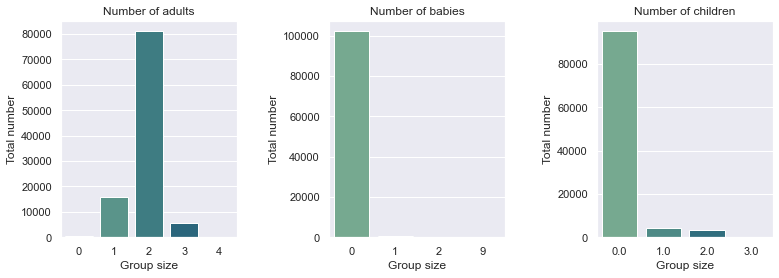

In [17]:
hotel_num = hotel[["lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","previous_cancellations","previous_bookings_not_canceled","booking_changes","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests"]]
fig, ax = plt.subplots(1,3,figsize=(12,5))
fig.tight_layout(pad=5.0)
sns.countplot(x=hotel_num.adults, ax=ax[0], palette="crest").set(title="Number of adults", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.babies, ax=ax[1], palette="crest").set(title="Number of babies", ylabel="Total number", xlabel="Group size")

sns.countplot(x=hotel_num.children, ax=ax[2], palette="crest").set(title="Number of children", ylabel="Total number", xlabel="Group size")

From the graphs above, we can see that most reservations were made by adults without children or babies. Approximately 74% of adults travel with another adult, most likely the two adults are couples travel together. Travelling with babies or children is rare. From the graph "Number of adults" we can see that there is a column 0, this could be that the bookings were made by teenagers and young adults (below 18 years old), who travel alone or with friends/ spouse.

## Lead time (the number of days from booking to arrival date), Booking changes

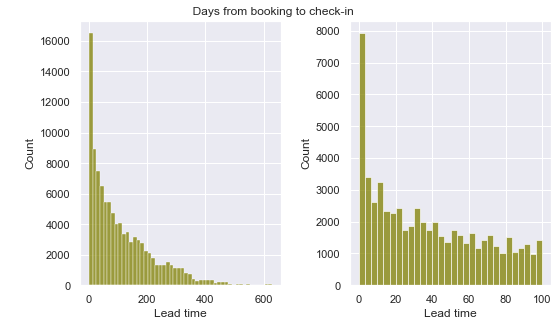

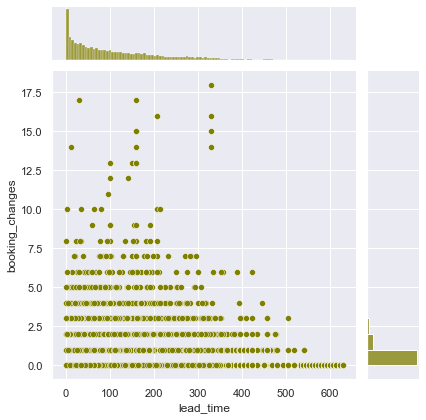

In [18]:
days_to_dep_list = []

for days in hotel_num["lead_time"]:
    if days <= 100:
        days_to_dep_list.append(days)

fig, ax = plt.subplots(1,2, figsize=(8,5))
fig.tight_layout(pad=3)
    
sns.histplot(hotel_num.lead_time, bins=50, color="olive", ax=ax[0]).set(xlabel= "Lead time",title="                                                       Days from booking to check-in")
sns.histplot(days_to_dep_list, bins=30, color="olive", ax=ax[1]).set(xlabel="Lead time")
sns.jointplot(x=hotel.lead_time, y=hotel.booking_changes, color="olive")

From the graph above, we can see that It seems the longer people book in advance the less they are likely to change their original reservation.

## Correlations Plot

<AxesSubplot:>

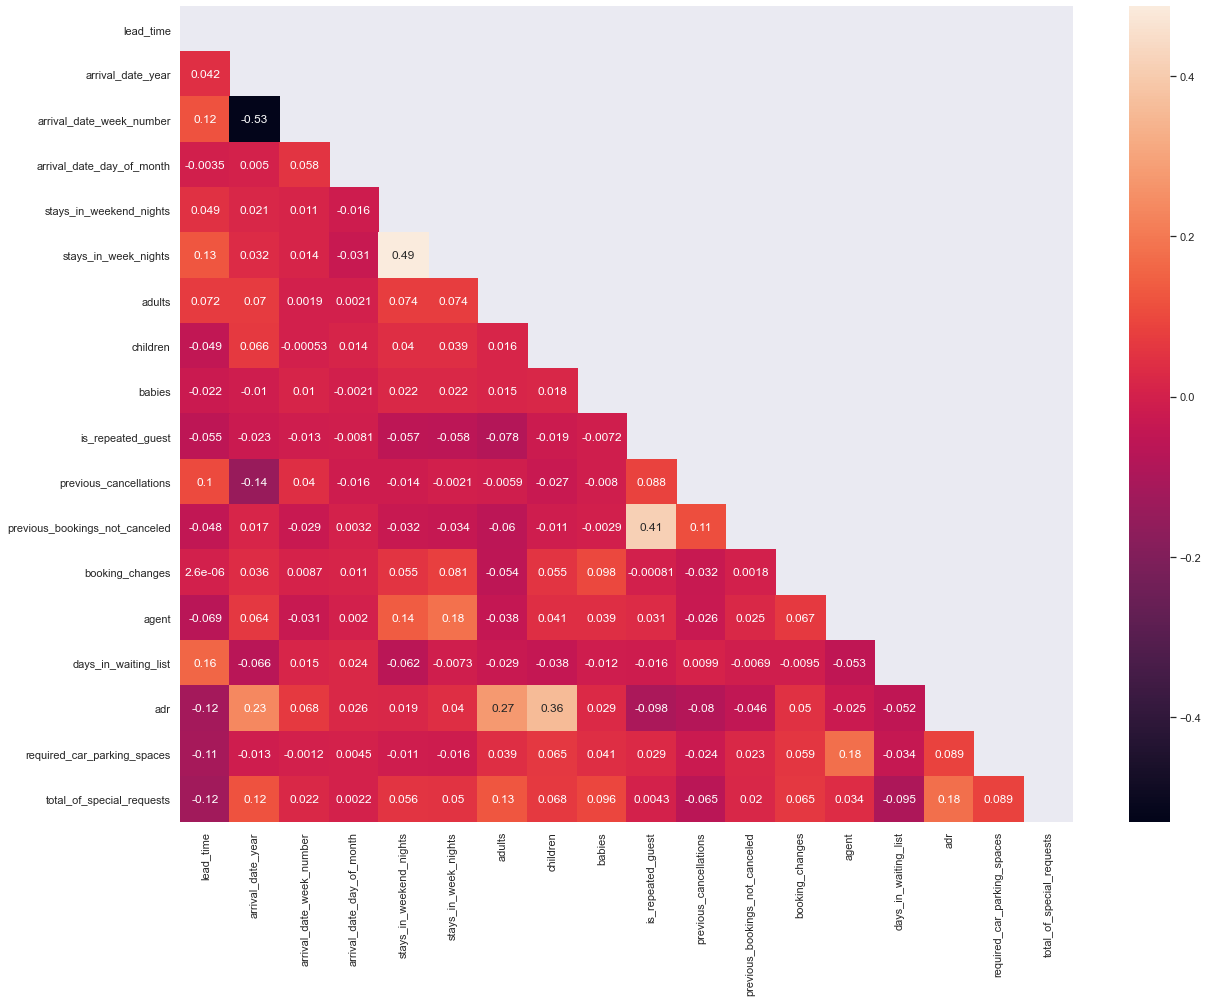

In [19]:
plt.figure(figsize=(20,15))

corr= hotel.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

From the plots, We see lot of correlation among the following variables:
1. stays_in_week_nights & stays_in_weekend_nights are highly correlated. 
2.  Arrival_date_week_number & arrival_date_year are negatively correlated.
3. Previous_booking_not_cancelled & Is_repeated_guest are positvely correlated.

### Final Preprocessing Of Data

In [20]:
#Converted arrival_date_month to a numerical variable
hotel["arrival_date_month"] = hotel["arrival_date_month"].replace({"January":1,"February":2,
                                                                  "March":3,"April":4,
                                                                  "May":5,"June":6,
                                                                  "July":7,"August":8,
                                                                  "September":9,"October":10,
                                                                  "November":11,"December":12})

We removed the reservation_status and reservation_status_date because of multicolinearity with the response variable is_cancelled.

In [21]:
new_hotel = hotel.drop(columns=["reservation_status","reservation_status_date"])

In [22]:
new_hotel['is_canceled']= new_hotel['is_canceled'].replace(["Cancelled","Not Cancelled"],[1,0])

In [23]:
new_hotel.reset_index(inplace=True,drop=True)

Final dataframe before one-hot encoding and scaling

In [24]:
new_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102967 entries, 0 to 102966
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102967 non-null  object 
 1   is_canceled                     102967 non-null  int64  
 2   lead_time                       102967 non-null  int64  
 3   arrival_date_year               102967 non-null  int64  
 4   arrival_date_month              102967 non-null  int64  
 5   arrival_date_week_number        102967 non-null  int64  
 6   arrival_date_day_of_month       102967 non-null  int64  
 7   stays_in_weekend_nights         102967 non-null  int64  
 8   stays_in_week_nights            102967 non-null  int64  
 9   adults                          102967 non-null  int64  
 10  children                        102967 non-null  float64
 11  babies                          102967 non-null  int64  
 12  meal            

#### One-Hot-Encoding and Standard Scaling our data

In [25]:
X = new_hotel.drop("is_canceled",axis=1)
y = new_hotel["is_canceled"]

In [26]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler(sampling_strategy={0:20000,1:20000})
X_us, y_us = us.fit_resample(X, y)

# Plot the new class distributions for y using the same funnction as above. 
# plot_class_dist(y_us)



In [27]:
X_us

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,6,2017,7,30,28,2,2,2,0.0,...,D,D,0,No Deposit,241.0,0,Transient,168.15,0,1
1,Resort Hotel,139,2017,6,26,29,0,3,2,3.0,...,C,H,3,No Deposit,240.0,0,Transient,158.00,1,1
2,City Hotel,19,2015,7,30,25,2,2,2,0.0,...,A,A,0,No Deposit,1.0,0,Transient-Party,62.00,0,0
3,Resort Hotel,19,2017,5,21,27,2,5,2,0.0,...,F,F,1,No Deposit,241.0,0,Transient,161.60,0,2
4,City Hotel,72,2016,12,52,22,1,3,3,0.0,...,D,D,0,No Deposit,14.0,0,Transient,128.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,City Hotel,49,2017,2,7,13,1,3,2,2.0,...,F,F,0,No Deposit,9.0,0,Transient,149.60,0,0
39996,City Hotel,134,2017,2,8,25,0,1,1,0.0,...,A,A,0,No Deposit,30.0,0,Transient-Party,75.00,0,0
39997,City Hotel,61,2017,1,4,25,0,2,2,0.0,...,A,A,0,Non Refund,326.0,0,Transient,80.00,0,0
39998,City Hotel,145,2015,8,35,29,2,1,2,0.0,...,A,A,0,No Deposit,17.0,0,Transient-Party,94.50,0,0


In [28]:
#One hot encode specific columns without standardizing and scaling continuous variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hotel", 'meal','market_segment','distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']

ohe = OneHotEncoder(drop="first")

hotel_object = X_us.select_dtypes('object')
ohe.fit(hotel_object)

codes = ohe.transform(hotel_object).toarray()
feature_names = ohe.get_feature_names(categorical_features)

X_us = pd.concat([X_us.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [29]:
X_us

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,6,2017,7,30,28,2,2,2,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,139,2017,6,26,29,0,3,2,3.0,0,...,0,0,1,0,0,0,0,0,1,0
2,19,2015,7,30,25,2,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,19,2017,5,21,27,2,5,2,0.0,1,...,1,0,0,0,0,0,0,0,1,0
4,72,2016,12,52,22,1,3,3,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,49,2017,2,7,13,1,3,2,2.0,0,...,1,0,0,0,0,0,0,0,1,0
39996,134,2017,2,8,25,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,1
39997,61,2017,1,4,25,0,2,2,0.0,0,...,0,0,0,0,0,1,0,0,1,0
39998,145,2015,8,35,29,2,1,2,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
y

0         0
1         0
2         0
3         0
4         1
         ..
102962    0
102963    0
102964    0
102965    0
102966    0
Name: is_canceled, Length: 102967, dtype: int64

### Standard Scaling All Continuous Variables

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
continuous_variables = ['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']
stdsclr = StandardScaler()

X_us[continuous_variables] = stdsclr.fit_transform(X_us[continuous_variables])

In [32]:
X_us.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H',

# Modeling and Evaluation 1

train and adjust parameters (GridSearch)

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.10, random_state=0)

In [34]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

In [35]:
%%time
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)

EvaluateClassifierEstimator(clf, X_us, y_us, cv)

The average accuracy for all cv folds is: 			 0.77325
The average precision for all cv folds is: 			 0.79815
The average recall for all cv folds is: 			 0.7315
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 4.34 s


,Accuracy,Precision,Recall
0,0.77250,0.796196,0.7325
1,0.77125,0.796286,0.7290
2,0.77600,0.801969,0.7330


### Using clustering to feature engineer

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#### What to cluster

In [96]:
X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

For Loops

X1

Average accuracy=  4 77.575 +- 0.35414215601459387

In [64]:
%%time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

params = []
for n in range(3,12):

    X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]

    cls = KMeans(n_clusters=n, init='k-means++')
    cls.fit(X1)
    
    newfeature = cls.labels_ # the labels from kmeans clustering
    
    original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
    X_final = np.column_stack((original_X,pd.get_dummies(newfeature)))
    
    acc = cross_val_score(clf,X_final,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print ("Average accuracy= ",n, acc.mean()*100, "+-", acc.std()*100)
    

Average accuracy=  3 77.375 +- 0.2806243040080464
Average accuracy=  4 77.575 +- 0.35414215601459387
Average accuracy=  5 77.48333333333333 +- 0.4478342947514831
Average accuracy=  6 77.34166666666667 +- 0.34900652652286646
Average accuracy=  7 77.39166666666667 +- 0.39387674326988553
Average accuracy=  8 77.36666666666666 +- 0.33187179586233134
Average accuracy=  9 77.35 +- 0.3824264635194596
Average accuracy=  10 77.33333333333334 +- 0.22016408022704814
Average accuracy=  11 77.325 +- 0.2557668208870457
Wall time: 37.9 s


X2

Average accuracy=  6 77.69166666666666 +- 0.14481789330818762

In [97]:
%%time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

params = []
for n in range(3,12):

    X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]

    cls = KMeans(n_clusters=n, init='k-means++')
    cls.fit(X2)
    
    newfeature = cls.labels_ # the labels from kmeans clustering
    
    original_X = X_us.drop(['arrival_date_week_number','arrival_date_year'], axis=1)
    X_final = np.column_stack((original_X,pd.get_dummies(newfeature)))
    
    acc = cross_val_score(clf,X_final,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print ("Average accuracy= ",n, acc.mean()*100, "+-", acc.std()*100)

Average accuracy=  3 77.26666666666665 +- 0.23921166824012485
Average accuracy=  4 77.25 +- 0.2549509756796402
Average accuracy=  5 77.26666666666667 +- 0.24352731993670845
Average accuracy=  6 77.25833333333334 +- 0.24692553983381946
Average accuracy=  7 77.26666666666667 +- 0.22391714737574295
Average accuracy=  8 77.28333333333333 +- 0.23213980461973738
Average accuracy=  9 77.27499999999999 +- 0.23540744819709383
Average accuracy=  10 77.27499999999999 +- 0.23540744819709383
Average accuracy=  11 77.26666666666667 +- 0.24352731993670845
Wall time: 46.8 s


X3

Average accuracy=  5 77.33333333333334 +- 0.10069204977995715

In [61]:
%%time
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

params = []
for n in range(3,12):

    X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

    cls = KMeans(n_clusters=n, init='k-means++')
    cls.fit(X3)
    
    newfeature = cls.labels_ # the labels from kmeans clustering
    
    original_X = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
    X_final = np.column_stack((original_X,pd.get_dummies(newfeature)))
    
    acc = cross_val_score(clf,X_final,y=y_us,cv=cv)
    params.append((n,acc.mean()*100,acc.std()*100))
    
    print ("Average accuracy= ",n, acc.mean()*100, "+-", acc.std()*100)

Average accuracy=  3 77.20833333333333 +- 0.14337208778404606
Average accuracy=  4 77.24166666666666 +- 0.14337208778404173
Average accuracy=  5 77.33333333333334 +- 0.10069204977995715
Average accuracy=  6 77.26666666666667 +- 0.27182510717166725
Average accuracy=  7 77.16666666666666 +- 0.17118865486811985
Average accuracy=  8 77.225 +- 0.09354143466934713
Average accuracy=  9 77.25833333333334 +- 0.20548046676563272
Average accuracy=  10 77.29166666666666 +- 0.2903541898364081
Average accuracy=  11 77.375 +- 0.2354074481970954
Wall time: 43.4 s


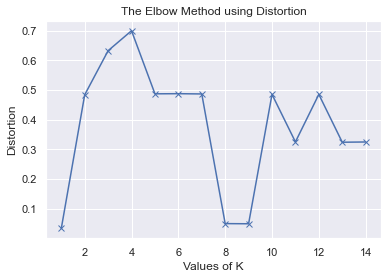

In [42]:
n_shape = range(1,15)
plt.plot(n_shape, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

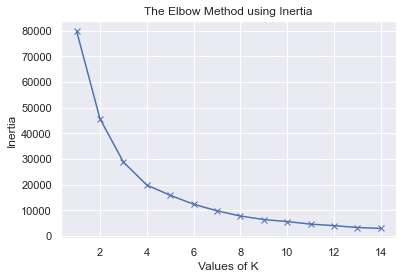

In [43]:
plt.plot(n_shape, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

2 For Loops for KMeans

Average accuracy)=  7 3 77.39166666666667 +- 0.1940074454470483

In [65]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
import numpy as np

X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]

params = []
distortions = []
inertias = []
# we want to include ranges that have our best results from above
for n in range(3,9):
    for n2 in range(3,9):

    
        cls = KMeans(n_clusters=n, init='k-means++',random_state=1)
        cls.fit(X1)
        newfeature = cls.labels_ # the labels from kmeans clustering

        cls2 = KMeans(n_clusters=n2, init='k-means++',random_state=1)
        cls2.fit(X2)
        newfeature2 = cls2.labels_ # the labels from kmeans clustering
        
        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled',
                           'stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature,pd.get_dummies(newfeature2))))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((n,n2,acc.mean()*100,acc.std()*100))

        print ("Average accuracy)= ",n,n2, acc.mean()*100, "+-", acc.std()*100)

        


Average accuracy)=  3 3 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  3 4 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  3 5 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  3 6 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  3 7 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  3 8 77.33333333333333 +- 0.21245914639969993
Average accuracy)=  4 3 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  4 4 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  4 5 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  4 6 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  4 7 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  4 8 77.51666666666667 +- 0.21245914639969993
Average accuracy)=  5 3 77.325 +- 0.27003086243366364
Average accuracy)=  5 4 77.325 +- 0.27003086243366364
Average accuracy)=  5 5 77.325 +- 0.27003086243366364
Average accuracy)=  5 6 77.325 +- 0.27003086243366364
Aver

#### DBSCN For loop

X1 - 

In [69]:
#X1

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls = DBSCAN(eps=eps, min_samples=mpts)
        cls.fit(X1)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy =  77.45833333333333 +- 0.27182510717166725
0.1 6 Average accuracy =  77.45 +- 0.28357832545289563
0.1 7 Average accuracy =  77.45 +- 0.2669269563007825
0.1 8 Average accuracy =  77.45 +- 0.2669269563007825
0.1 9 Average accuracy =  77.45833333333336 +- 0.25522321385189356
0.125 5 Average accuracy =  77.45833333333333 +- 0.27182510717166725
0.125 6 Average accuracy =  77.45 +- 0.28357832545289563
0.125 7 Average accuracy =  77.45 +- 0.2669269563007825
0.125 8 Average accuracy =  77.45 +- 0.2669269563007825
0.125 9 Average accuracy =  77.45833333333336 +- 0.25522321385189356
0.15 5 Average accuracy =  77.45833333333333 +- 0.27182510717166725
0.15 6 Average accuracy =  77.45 +- 0.28357832545289563
0.15 7 Average accuracy =  77.45 +- 0.2669269563007825
0.15 8 Average accuracy =  77.45 +- 0.2669269563007825
0.15 9 Average accuracy =  77.45833333333336 +- 0.25522321385189356


In [98]:
#X2
params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls = DBSCAN(eps=eps, min_samples=mpts)
        cls.fit(X2)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

0.1 5 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.1 6 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.1 7 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.1 8 Average accuracy =  77.31666666666666 +- 0.16996731711975965
0.1 9 Average accuracy =  77.31666666666666 +- 0.16996731711975965
0.125 5 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.125 6 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.125 7 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.125 8 Average accuracy =  77.31666666666666 +- 0.16996731711975965
0.125 9 Average accuracy =  77.31666666666666 +- 0.16996731711975965
0.15 5 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.15 6 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.15 7 Average accuracy =  77.30833333333335 +- 0.15855247992033847
0.15 8 Average accuracy =  77.31666666666666 +- 0.16996731711975965
0.15 9 Average accuracy =  77.31666666666666 +- 

In [45]:
%%time 
#X3
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
from sklearn.cluster import DBSCAN

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,10):

        # append on the clustering
        cls = DBSCAN(eps=eps, min_samples=mpts)
        cls.fit(X3)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((eps,mpts,acc.mean()*100,acc.std()*100))

        print (eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)
        


0.1 5 Average accuracy =  77.36666666666666 +- 0.15855247992033847
0.1 6 Average accuracy =  77.49166666666666 +- 0.10474837574980676
0.1 7 Average accuracy =  77.4 +- 0.035355339059328715
0.1 8 Average accuracy =  77.36666666666666 +- 0.1296362432175299
0.1 9 Average accuracy =  77.41666666666666 +- 0.11242281302693692
0.125 5 Average accuracy =  77.51666666666667 +- 0.15320646925708412
0.125 6 Average accuracy =  77.46666666666667 +- 0.16372402253657126
0.125 7 Average accuracy =  77.45833333333333 +- 0.16499158227686161
0.125 8 Average accuracy =  77.49166666666666 +- 0.08498365855987909
0.125 9 Average accuracy =  77.45 +- 0.07359800721939566
0.15 5 Average accuracy =  77.46666666666667 +- 0.17118865486811985
0.15 6 Average accuracy =  77.4 +- 0.13385315336841164
0.15 7 Average accuracy =  77.4 +- 0.181429508808981
0.15 8 Average accuracy =  77.35 +- 0.23003622903070517
0.15 9 Average accuracy =  77.38333333333333 +- 0.18521758975744085
Wall time: 4min 52s


#### AgglomerativeClustering For Loop

In [73]:
from sklearn.cluster import AgglomerativeClustering
params = []
for link in ['ward', 'complete', 'average']:
    for n in range(4,5):

        # append on the clustering
        cls = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls.fit(X1)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print ("C=",n,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 4 ward Average accuracy =  77.525 +- 0.39370039370058996
C= 4 complete Average accuracy =  77.51666666666667 +- 0.38532093405656215
C= 4 average Average accuracy =  77.54166666666666 +- 0.35492565731745135


In [74]:
params = []
for link in ['ward', 'complete', 'average']:
    for n in range(6,7):

        # append on the clustering
        cls = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls.fit(X2)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['is_repeated_guest','previous_bookings_not_canceled'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print ("C=",n,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 6 ward Average accuracy =  77.325 +- 0.12747548783981938
C= 6 complete Average accuracy =  77.31666666666666 +- 0.16499158227685862
C= 6 average Average accuracy =  77.3 +- 0.14142135623730964


In [75]:
#%%time 

X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

params = []
for link in ['ward', 'complete', 'average']:
    for n in range(5,6):

        # append on the clustering
        cls = AgglomerativeClustering(n_clusters=n, linkage=link)
        cls.fit(X3)
        newfeature_1 = cls.labels_ # the labels from kmeans clustering

        original_X = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
        final_X = np.column_stack((original_X,pd.get_dummies(newfeature_1)))

        acc = cross_val_score(clf,final_X,y=y_us,cv=cv)
        params.append((link,n,acc.mean()*100,acc.std()*100))

        print ("C=",n,link,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C= 5 ward Average accuracy =  77.30833333333335 +- 0.08498365855987909
C= 5 complete Average accuracy =  77.21666666666667 +- 0.031180478223112748
C= 5 average Average accuracy =  77.21666666666667 +- 0.08249579113843192


#### Gaussian Mixture For Loop

Best Gausian

X1
GaussianMixture(covariance_type='diag', n_components=19)

X2
GaussianMixture(covariance_type='diag', n_components=19)

X3
GaussianMixture(covariance_type='diag', n_components=15)

In [79]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
#X1
lowest_bic = np.infty
bic = []
n_components_range = range(4, 20)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X1)
        bic.append(gmm.bic(X1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm

GaussianMixture(covariance_type='diag', n_components=19)

In [99]:
#X2
lowest_bic = np.infty
bic = []
n_components_range = range(5,20)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X2)
        bic.append(gmm.bic(X2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm

GaussianMixture(covariance_type='diag', n_components=19)

In [78]:
#X3
lowest_bic = np.infty
bic = []
n_components_range = range(7, 17)
cv_types = ['spherical', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X3)
        bic.append(gmm.bic(X3))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm

GaussianMixture(covariance_type='diag', n_components=15)

In [49]:
%%time
from sklearn import metrics as mt
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

clf_gmm = mixture.GaussianMixture(n_components=14, covariance_type='diag')
clf_gmm.fit(X3)

newfeature = clf_gmm.labels_ # the labels from kmeans clustering

X_change = X_us.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)

X_new = np.column_stack((X_change,pd.get_dummies(newfeature)))

acc = cross_val_score(cls,X_new,y=y_us,cv=cv)

print ("Average accuracy", acc.mean()*100, "+-", acc.std()*100)


%%time
clf_gmm = mixture.GaussianMixture(n_components=18, covariance_type='diag')

for train, test in cv.split(X_train_scaled,y_train):
    clf_gmm.fit(X_train_scaled,y_train)
    yhat_gmm = clf_gmm.predict(X_test_scaled)
    
total_accuracy_gmm = mt.accuracy_score(y_test, yhat_gmm)

print ('Accuracy of "Gaussian Mixture"', total_accuracy_gmm)

AttributeError: 'GaussianMixture' object has no attribute 'labels_'

# Modeling and Evaluation 2

evaluate and compare

# Modeling and Evaluation 3

Visualize

PCA
https://www.scikit-yb.org/en/latest/

Elbow graph
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

sill graph
https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

intercluster
https://www.scikit-yb.org/en/latest/api/cluster/icdm.html

denger gram

In [108]:
n=4
n2=6
n3 = 5

X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]

cls = KMeans(n_clusters=n, init='k-means++',random_state=1)
cls.fit(X1)
newfeature = cls.labels_ # the labels from kmeans clustering

# append on the second clustering
cls2 = KMeans(n_clusters=n2, init='k-means++',random_state=1)
cls2.fit(X2)
newfeature2 = cls2.labels_ # the labels from kmeans clustering

# append on the third clustering
cls3 = KMeans(n_clusters=n3, init='k-means++',random_state=1)
cls3.fit(X3)
newfeature3 = cls3.labels_ # the labels from kmeans clustering


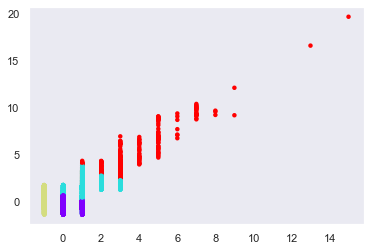

In [90]:
X1 = X_us[['stays_in_week_nights','stays_in_weekend_nights']]
X1=X1.values
plt.figure()
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel(''), plt.ylabel('')
plt.grid()

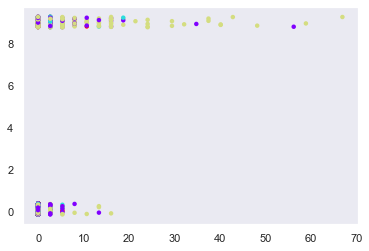

In [95]:
X2 = X_us[['is_repeated_guest','previous_bookings_not_canceled']]
X2=X2.values
plt.figure()
plt.scatter(X2[:, 1], X2[:, 0]+np.random.random(X2[:, 0].shape)/2, c=newfeature, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel(''), plt.ylabel('')
plt.grid()

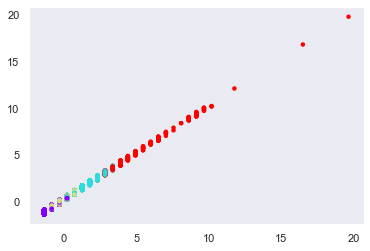

In [92]:
X3 = X_us[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
X3=X3.values
plt.figure()
plt.scatter(X3[:, 1], X1[:, 0]+np.random.random(X3[:, 0].shape)/2, c=newfeature, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel(''), plt.ylabel('')
plt.grid()

#### KMeans Visuals

In [ ]:
from sklearn.cluster import KMeans
# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=2,  # number of clusters
                random_state=1,
        n_init=15,       # number of different times to run k-means
        n_jobs=-1)
kmeans.fit(Cx_train)
# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(Cx_train[:, 1], Cx_train[:, -1], 'r.', markersize=2) #plot the data
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.scatter(Cx_train[:,0], Cx_train[:,1], s=500)
plt.show()

#### DBSCAN

In [ ]:
# Plotting K-distance Graph
distances = np.sort(X_train_scaled, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
plot_clusters(X_train_scaled, cluster.DBSCAN, (), {'eps':0.038})

#### Agglomerative clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_train_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.figure(figsize=(10, 10)) 
plt.show()

#### Gaussian Models

In [ ]:
# Plot 
import matplotlib as mpl
plt.figure(figsize=(8,4))
splot = plt.subplot(1,1,1)
Y_ = clf.predict(X)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    if len(covar.shape)<2:
        tmp = np.zeros((2,2))
        np.fill_diagonal(tmp,covar)
        covar = tmp
    elif covar.shape[0] != covar.shape[1]:
        covar = np.diag(covar)
        
    v, w = linalg.eigh(covar)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)


plt.title('Selected GMM')
plt.show()

# Modeling and Evaluation 4

Summarize and ramifications

# Deployment

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?


# Exceptional Work

You have free reign to provide additional analyses or combine analyses.

Clustering using pairwise distances. Undersample to 1000 instances per class to get pairwise distances.

In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler(sampling_strategy={0:5000,1:5000})
X_pair, y_pair = us.fit_resample(X, y)

In [53]:
#One hot encode specific columns without standardizing and scaling continuous variables
from sklearn.preprocessing import OneHotEncoder
categorical_features = ["hotel", 'meal','market_segment','distribution_channel',
                        'reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type']

ohe = OneHotEncoder(drop="first")

hotel_object = X_pair.select_dtypes('object')
ohe.fit(hotel_object)

codes = ohe.transform(hotel_object).toarray()
feature_names = ohe.get_feature_names(categorical_features)

X_pair = pd.concat([X_pair.select_dtypes(exclude='object'), 
               pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [54]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
continuous_variables = ['lead_time',"arrival_date_month",'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                        'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
                        'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
                        'booking_changes','agent','days_in_waiting_list','adr','required_car_parking_spaces',
                        'total_of_special_requests']
stdsclr = StandardScaler()

X_pair[continuous_variables] = stdsclr.fit_transform(X_pair[continuous_variables])

In [55]:
EvaluateClassifierEstimator(clf, X_pair, y_pair, cv)

The average accuracy for all cv folds is: 			 0.78233
The average precision for all cv folds is: 			 0.80391
The average recall for all cv folds is: 			 0.74733
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.777,0.792812,0.750
1,0.796,0.827434,0.748
2,0.774,0.791489,0.744


In [56]:
y_pair.shape

(10000,)

Create pairwise distances for these variables

In [57]:
from sklearn.metrics.pairwise import pairwise_distances

X_choose = X_pair[['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights']]
d = pairwise_distances(X_choose, metric='euclidean')
cls = KMeans(n_clusters=11, init='k-means++',random_state=1)
cls.fit(d)
newfeature = cls.labels_
X_change = X_pair.drop(['adr','stays_in_week_nights', 'adults', 'children','babies','stays_in_weekend_nights'], axis=1)
X_new = np.column_stack((X_change,pd.get_dummies(newfeature)))
acc = cross_val_score(clf,X_new,y=y_pair,cv=cv)
print ("Average accuracy", acc.mean()*100, "+-", acc.std()*100)

Average accuracy 77.73333333333333 +- 0.6649979114420007


In [58]:
EvaluateClassifierEstimator(clf, X_new, y_pair, cv)

The average accuracy for all cv folds is: 			 0.77733
The average precision for all cv folds is: 			 0.79831
The average recall for all cv folds is: 			 0.74267
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.781,0.800857,0.748
1,0.783,0.813747,0.734
2,0.768,0.780335,0.746
